> # Customer churn

# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
import os
print(os.listdir("../input/bank-customer-churn-modeling"))

['Churn_Modelling.csv']


In [3]:
data = pd.read_csv('../input/bank-customer-churn-modeling/Churn_Modelling.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
data.duplicated().sum()

0

**EDA for each feature**

Male      5457
Female    4543
Name: Gender, dtype: int64
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


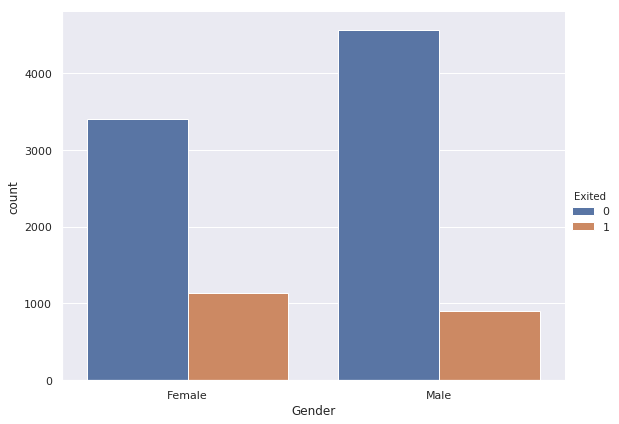

In [7]:
print(data.Gender.value_counts())
print(data.Gender.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='Gender', height=6, aspect=1.3, hue="Exited");

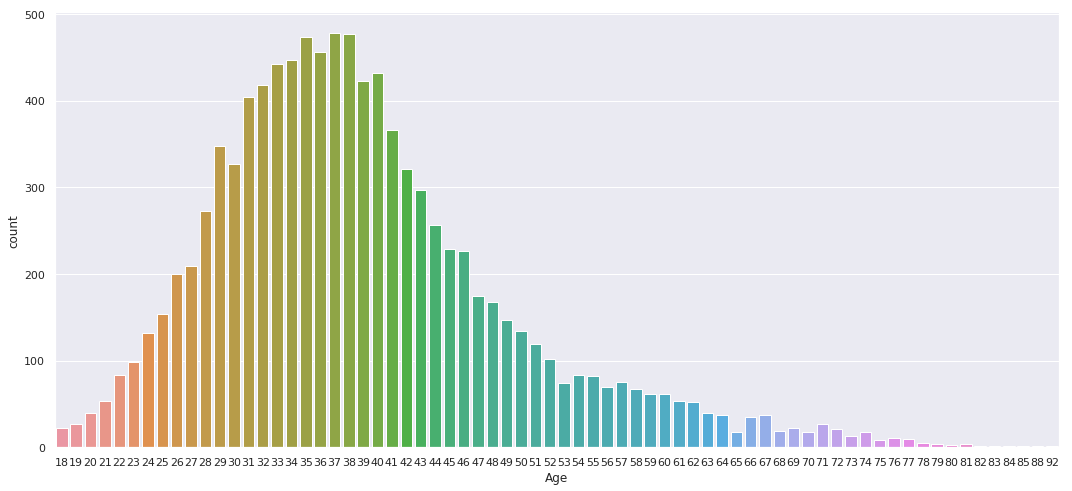

In [8]:
plt.figure(figsize=(18, 8))
sns.countplot(x=data.Age, data=data);

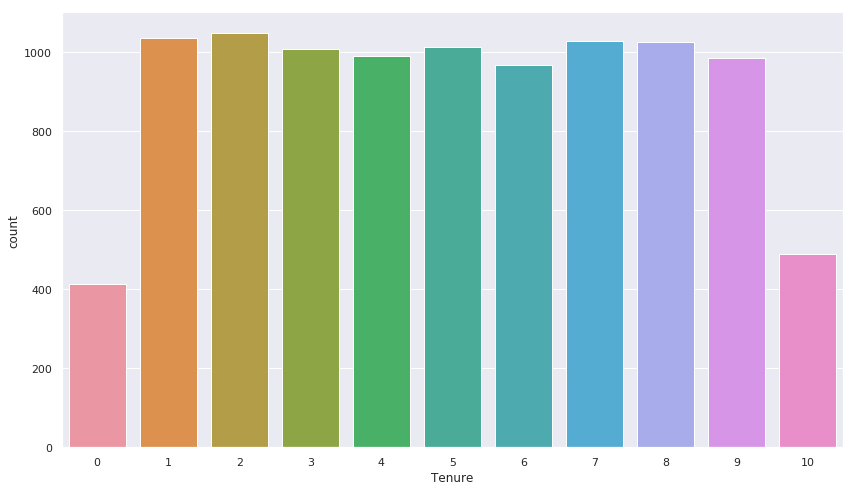

In [9]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Tenure', data=data);

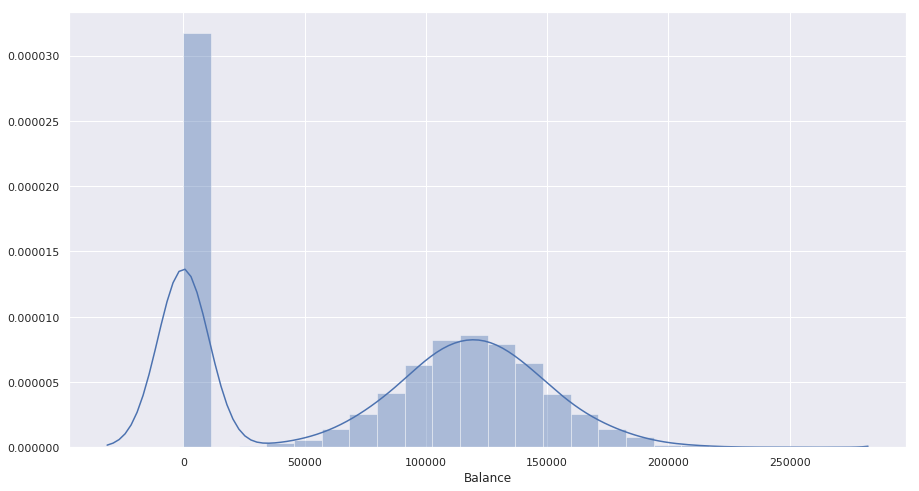

In [10]:
plt.figure(figsize=(15, 8))
sns.distplot(data.Balance);

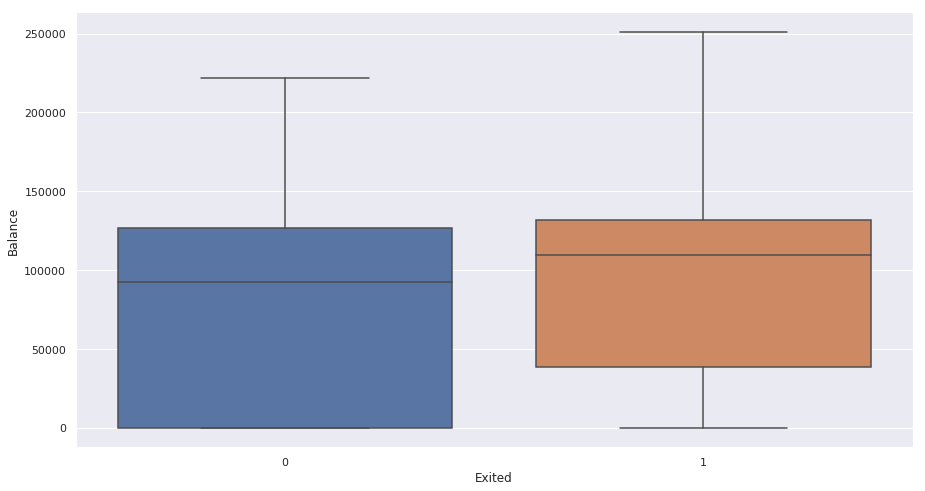

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Exited', y='Balance', data=data);

In [12]:
data[data['Exited'] == 0]['Balance'].describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [13]:
data[data['Exited'] == 1]['Balance'].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64


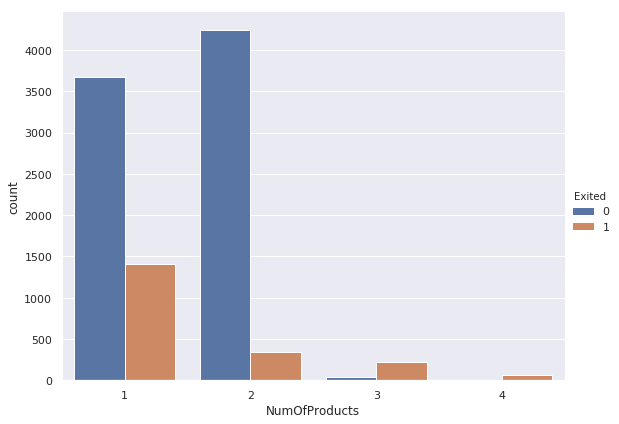

In [14]:
print(data.NumOfProducts.value_counts())
print(data.NumOfProducts.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='NumOfProducts', hue="Exited", height=6, aspect=1.3);

1    7055
0    2945
Name: HasCrCard, dtype: int64
1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64


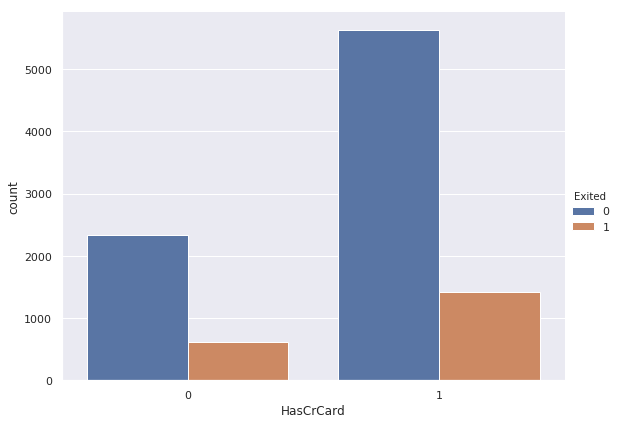

In [15]:
print(data.HasCrCard.value_counts())
print(data.HasCrCard.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='HasCrCard', height=6, aspect=1.3, hue="Exited");

1    5151
0    4849
Name: IsActiveMember, dtype: int64
1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64


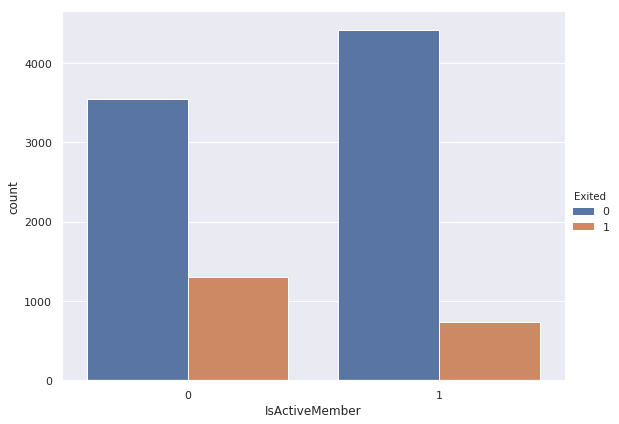

In [16]:
print(data.IsActiveMember.value_counts())
print(data.IsActiveMember.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='IsActiveMember', height=6, aspect=1.3, hue="Exited");

In [17]:
data.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

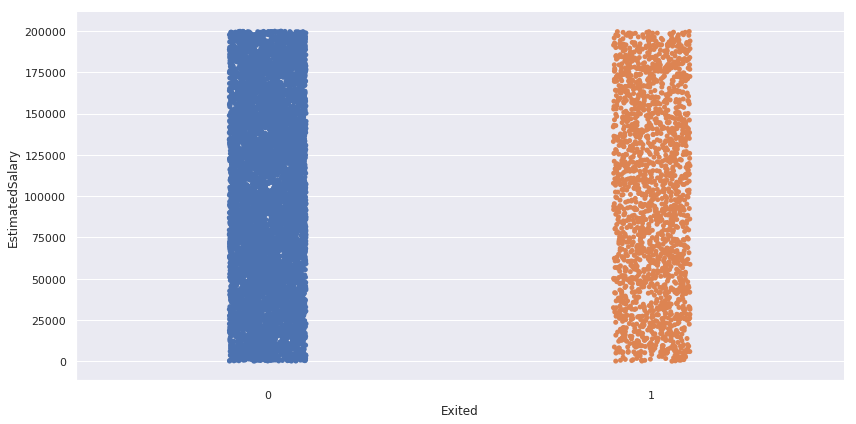

In [18]:
sns.catplot(x='Exited', y='EstimatedSalary', data=data, height=6, aspect=2);

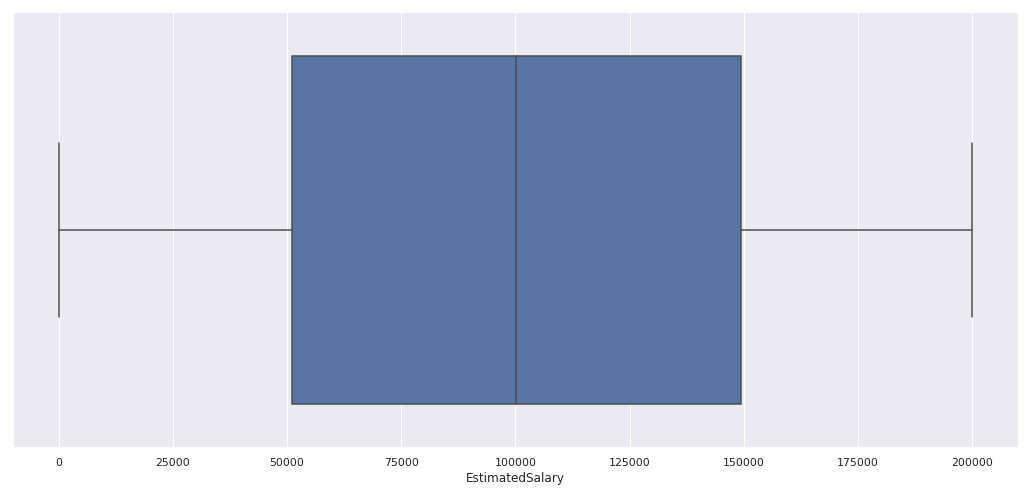

In [19]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='EstimatedSalary', data=data);

In [20]:
data[data['EstimatedSalary'] < 50000]['EstimatedSalary'].describe()

count     2453.000000
mean     24926.066066
std      14571.631954
min         11.580000
25%      12266.060000
50%      25183.010000
75%      37240.110000
max      49978.670000
Name: EstimatedSalary, dtype: float64

In [21]:
data[data['EstimatedSalary'] < 2000]['EstimatedSalary'].describe()

count     107.000000
mean      978.418411
std       539.518432
min        11.580000
25%       568.905000
50%       937.150000
75%      1392.070000
max      1985.410000
Name: EstimatedSalary, dtype: float64

0    7963
1    2037
Name: Exited, dtype: int64
0    0.7963
1    0.2037
Name: Exited, dtype: float64


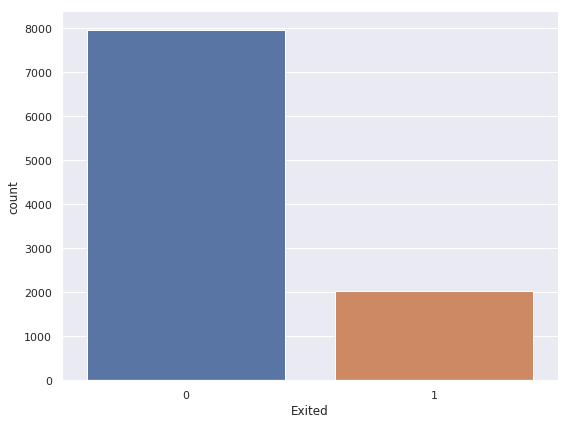

In [22]:
print(data.Exited.value_counts())
print(data.Exited.value_counts(normalize=True))
sns.catplot(kind='count', data=data, x='Exited', height=6, aspect=1.3);

### EDA conslusion:

- strange salary range - 11.58 - 199 992.48.
- NumOfProducts from 3 to 4 just Exited clients.
- Exited - 20%, non-exited - 80%. Unbalance of classes.

## 2. FE and checking models

In [23]:
target = data['Exited']
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1, inplace=True)

In [24]:
l = list(data.columns)

l.remove('Geography')
l.remove('Gender')
l.remove('NumOfProducts')
l.remove('HasCrCard')
l.remove('IsActiveMember')
numeric = l

In [25]:
numeric

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [26]:
data[numeric].head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


In [27]:
data = pd.get_dummies(data, drop_first=True)

In [28]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])

In [31]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,1,0


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [33]:
data, features_test, target, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [34]:
features_train, features_valid, target_train, target_valid = train_test_split(data, target, test_size=0.25, random_state=42)

In [35]:
features_train.shape

(6000, 11)

In [36]:
features_valid.shape

(2000, 11)

In [37]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(features_train, target_train)
prediction = model.predict(features_valid)

In [38]:
f1_score(target_valid, prediction)

0.3115942028985507

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [40]:
proba = model.predict_proba(features_valid)
proba = proba[:, 1]
proba
auc_roc = roc_auc_score(target_valid, proba)
print(auc_roc)

0.7835912552198478


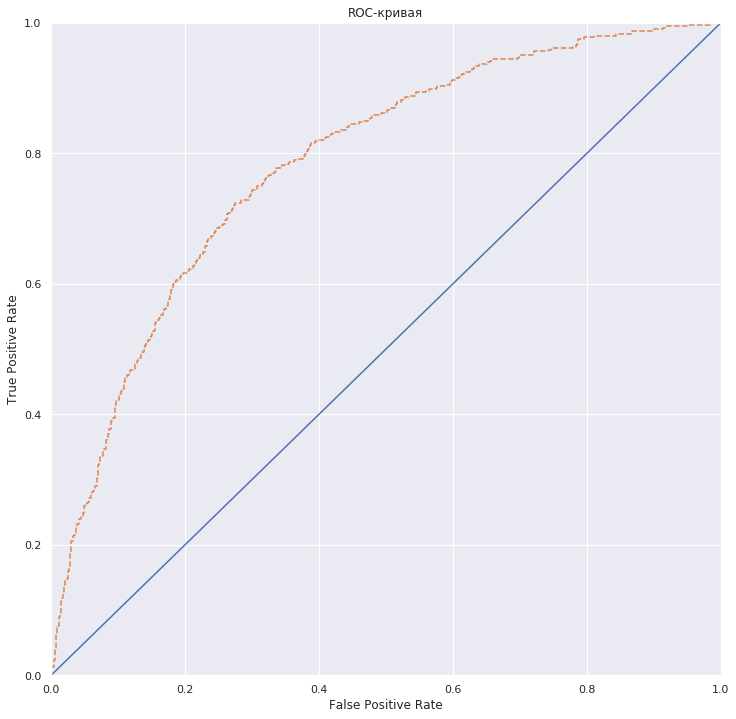

In [41]:
fpr, tpr, thresholds = roc_curve(target_valid, proba)

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
for i in range(1, 502, 50):
    model = GradientBoostingClassifier(n_estimators=i, random_state=42)
    model.fit(features_train, target_train)
    print(i, model.score(features_valid, target_valid))

1 0.7935
51 0.8635
101 0.8645
151 0.8615
201 0.864
251 0.8635
301 0.8635
351 0.864
401 0.8625
451 0.864
501 0.8625


In [44]:
%%time
model_gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
model_gbc.fit(features_train, target_train)
print(model_gbc.score(features_train, target_train))
print(model_gbc.score(features_valid, target_valid))

0.8856666666666667
0.863
CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


In [45]:
prediction = model_gbc.predict(features_valid)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
f1_score(target_valid, prediction)

0.5994152046783625

In [47]:
proba_gbc = model_gbc.predict_proba(features_valid)
proba_gbc = proba_gbc[:, 1]
proba_gbc

array([0.1253131 , 0.13884291, 0.03602729, ..., 0.30818492, 0.09945201,
       0.02869111])

In [48]:
auc_roc = roc_auc_score(target_valid, proba_gbc)
print(auc_roc)

0.8657600876369902


In [49]:
fpr, tpr, thresholds = roc_curve(target_valid, proba_gbc)

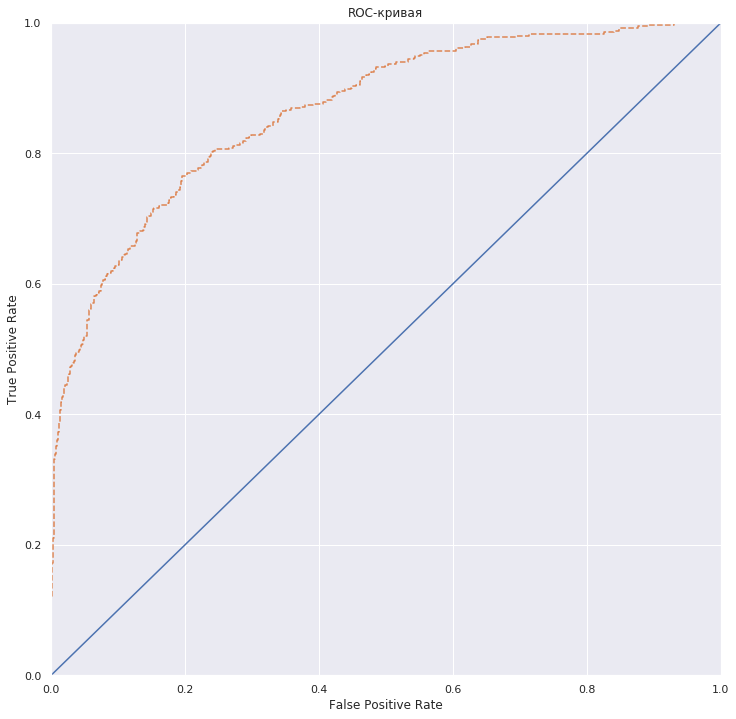

In [50]:
plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

## 3. Balancing - upsampling

In [51]:
from sklearn.utils import shuffle

In [52]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

In [53]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [54]:
print(features_train[target_train == 0].shape)
print(features_train[target_train == 1].shape)

(4769, 11)
(1231, 11)


In [55]:
print(features_upsampled[target_upsampled == 0].shape)
print(features_upsampled[target_upsampled == 1].shape)

(4769, 11)
(4924, 11)


In [56]:
model_lr = LogisticRegression(solver='liblinear', random_state=42)
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5185810810810811


In [57]:
proba = model_lr.predict_proba(features_valid)
proba = proba[:, 1]
proba
auc_roc = roc_auc_score(target_valid, proba)
print(auc_roc)

0.7848103003977536


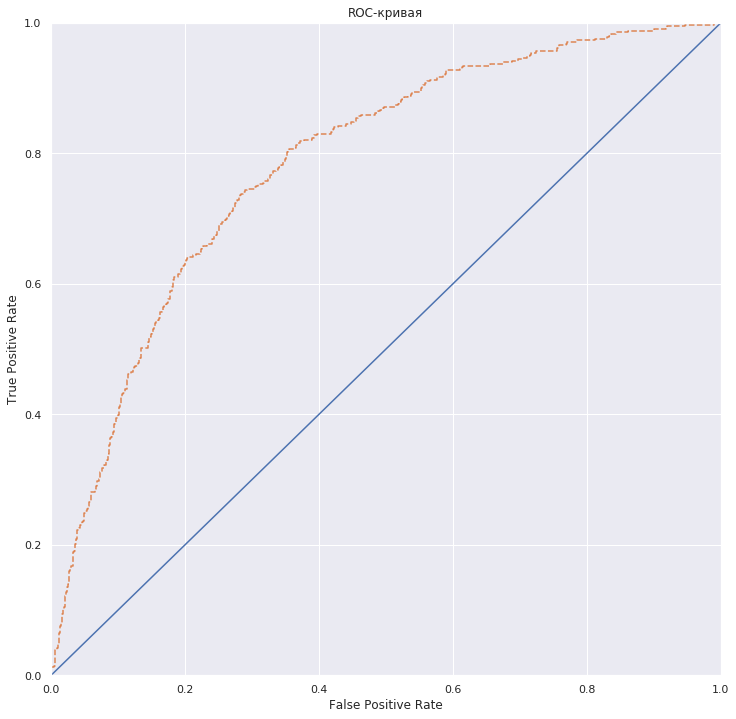

In [58]:
fpr, tpr, thresholds = roc_curve(target_valid, proba)

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [59]:
%%time
model_gbc = GradientBoostingClassifier(n_estimators=300, random_state=42)
model_gbc.fit(features_upsampled, target_upsampled)
print(model_gbc.score(features_upsampled, target_upsampled))
print(model_gbc.score(features_valid, target_valid))

0.8574228824925204
0.8035
CPU times: user 2.28 s, sys: 0 ns, total: 2.28 s
Wall time: 2.28 s


In [60]:
prediction = model_gbc.predict(features_valid)
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [61]:
f1_score(target_valid, prediction)

0.6097318768619663

In [62]:
proba_gbc = model_gbc.predict_proba(features_valid)
proba_gbc = proba_gbc[:, 1]
proba_gbc

array([0.38493884, 0.28267071, 0.07306804, ..., 0.64604254, 0.2752977 ,
       0.09638253])

In [63]:
auc_roc = roc_auc_score(target_valid, proba_gbc)
print(auc_roc)

0.866248315993598


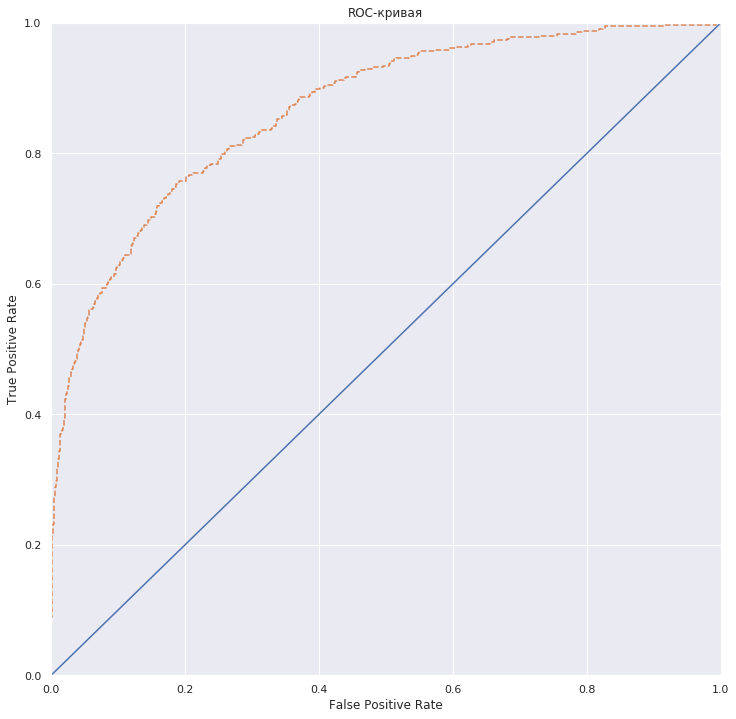

In [64]:
fpr, tpr, thresholds = roc_curve(target_valid, proba_gbc)

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

### Valid F1 score and ROC AUC better for GBClassifier than LogisticRegression[](http://)

## 4. Final testing

In [65]:
model_final = LogisticRegression(solver='liblinear', random_state=42)
model_final.fit(features_upsampled, target_upsampled)
prediction = model_final.predict(features_test)

In [66]:
f1_score(target_test, prediction)

0.5013146362839613

In [67]:
proba_final = model_final.predict_proba(features_test)
proba_final = proba_final[:, 1]
proba_final
auc_roc = roc_auc_score(target_test, proba_final)
print(auc_roc)

0.7817753435589524


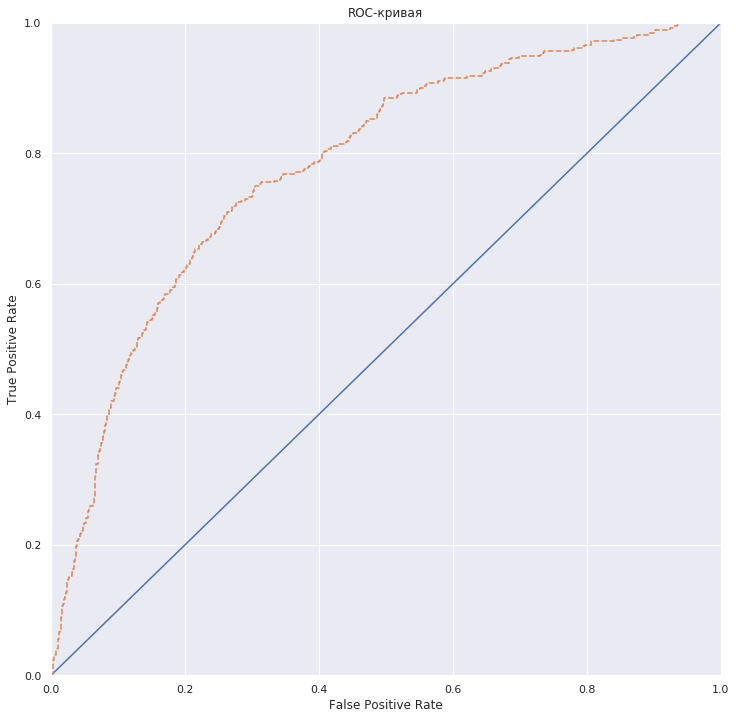

In [68]:
fpr, tpr, thresholds = roc_curve(target_test, proba_final)

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [69]:
model_gbc_final = GradientBoostingClassifier(n_estimators=300, random_state=42)
model_gbc_final.fit(features_upsampled, target_upsampled)
print(model_gbc_final.score(features_upsampled, target_upsampled))
print(model_gbc_final.score(features_valid, target_valid))
print(model_gbc_final.score(features_test, target_test))

0.8574228824925204
0.8035
0.8115


In [70]:
prediction = model_gbc_final.predict(features_test)
prediction

array([0, 0, 0, ..., 1, 0, 1])

In [71]:
f1_score(target_test, prediction)

0.6093264248704664

In [72]:
proba_gbc_final = model_gbc_final.predict_proba(features_test)
proba_gbc_final = proba_gbc_final[:, 1]
proba_gbc_final

array([0.16116647, 0.12730097, 0.38794441, ..., 0.92036026, 0.31294835,
       0.68887748])

In [73]:
auc_roc = roc_auc_score(target_test, proba_gbc_final)
print(auc_roc)

0.8623278246729085


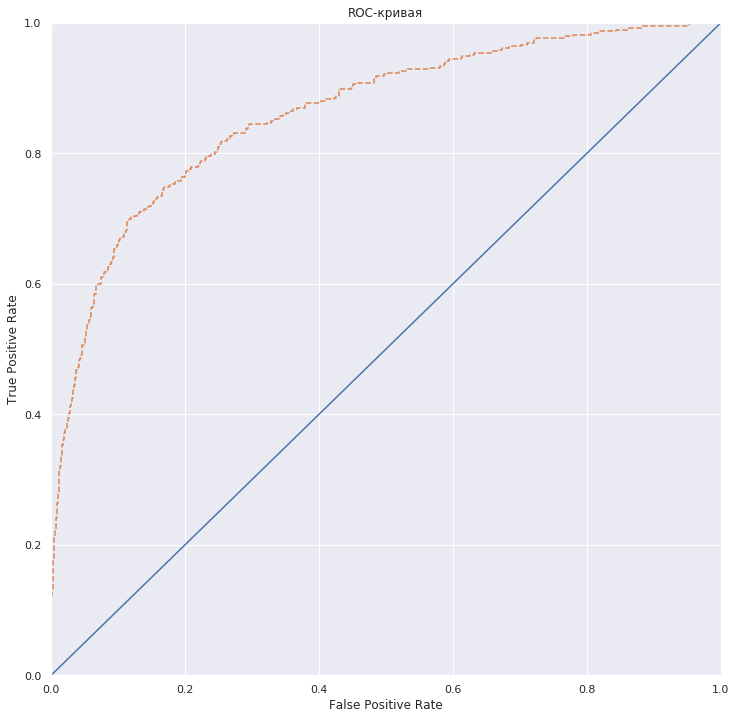

In [74]:
fpr, tpr, thresholds = roc_curve(target_test, proba_gbc_final)

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [75]:
for alpha in np.linspace(0.1, 1.0, 10):
    print(alpha)
    kombo=alpha*proba_final+(1-alpha)*proba_gbc_final
    auc_roc = roc_auc_score(target_test, kombo)
    print(auc_roc)
    kombo_final = np.rint(kombo)
    print(f1_score(target_test, kombo_final))
    print()

0.1
0.863960313577209
0.61139896373057

0.2
0.8643450806031501
0.6155440414507772

0.30000000000000004
0.8634013721773856
0.6212590299277605

0.4
0.8615377063768405
0.6178861788617886

0.5
0.8574826102721713
0.602

0.6
0.8505552204018362
0.575553416746872

0.7000000000000001
0.8396360705627891
0.5606773283160865

0.8
0.8240427138900897
0.545123062898815

0.9
0.8043863440957262
0.5196428571428571

1.0
0.7817753435589524
0.5013146362839613



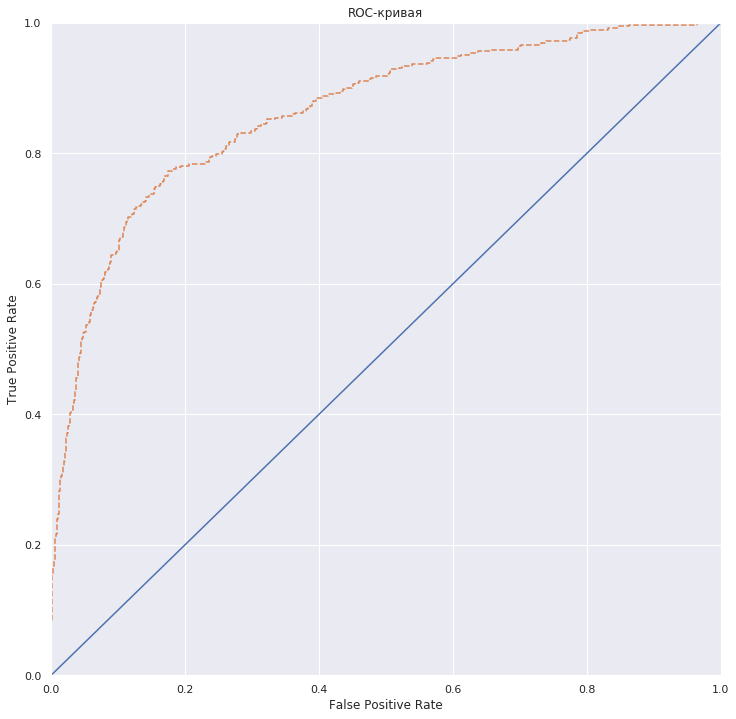

In [76]:
kombo=0.3*proba_final+(1-0.3)*proba_gbc_final

fpr, tpr, thresholds = roc_curve(target_test, kombo)

plt.figure(figsize=(12, 12))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()